In [ ]:
!pip install pandas
!pip install requests
!pip install bs4
!pip install html5lib 
!pip install lxml
!pip install plotly

In [16]:
import yfinance as yf
import pandas as pd

import warnings
warnings.simplefilter("ignore")

from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

# Yfinance Tasks

In [8]:
# --- Extract GameStop stock data ---
gamestop = yf.Ticker("GME")
gamestop_stock = gamestop.history(period="max")
gamestop_stock.reset_index(inplace=True)
gamestop_stock.head(5)  # Anzeige der ersten 5 Zeilen

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [5]:
# --- Extract Tesla stock data ---
tesla = yf.Ticker("TSLA")
tesla_stock = tesla.history(period="max")
tesla_stock.reset_index(inplace=True)
tesla_stock.head(5)  # Anzeige der ersten 5 Zeilen

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Webscraping Tasks


In [45]:
url =  "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
data  = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')

title = soup.title.string
print(title)

Tesla Revenue 2010-2022 | TSLA | MacroTrends


In [46]:
tesla_data = pd.DataFrame(columns=["Date", "Revenue"])

# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    Date = col[0].text
    Revenue = col[1].text

    
    # Finally we append the data of each row to the table
    tesla_data = pd.concat([tesla_data,pd.DataFrame({"Date":[Date], "Revenue":[Revenue]})], ignore_index=True)

    tesla_data.head()

In [47]:
tesla_data.head()

,Date,Revenue
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"


In [48]:
url2 =  "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
data2  = requests.get(url2).text
soup2 = BeautifulSoup(data2, 'html.parser')

title2 = soup2.title.string
print(title2)

GameStop Revenue 2006-2020 | GME | MacroTrends


In [49]:
gamestop_data = pd.DataFrame(columns=["Date", "Revenue"])

# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup2.find("tbody").find_all('tr'):
    col = row.find_all("td")
    Date = col[0].text
    Revenue = col[1].text

    
    # Finally we append the data of each row to the table
    gamestop_data = pd.concat([gamestop_data,pd.DataFrame({"Date":[Date], "Revenue":[Revenue]})], ignore_index=True)

    

In [51]:
gamestop_data.head() 

,Date,Revenue
0,2020,"$6,466"
1,2019,"$8,285"
2,2018,"$8,547"
3,2017,"$7,965"
4,2016,"$9,364"


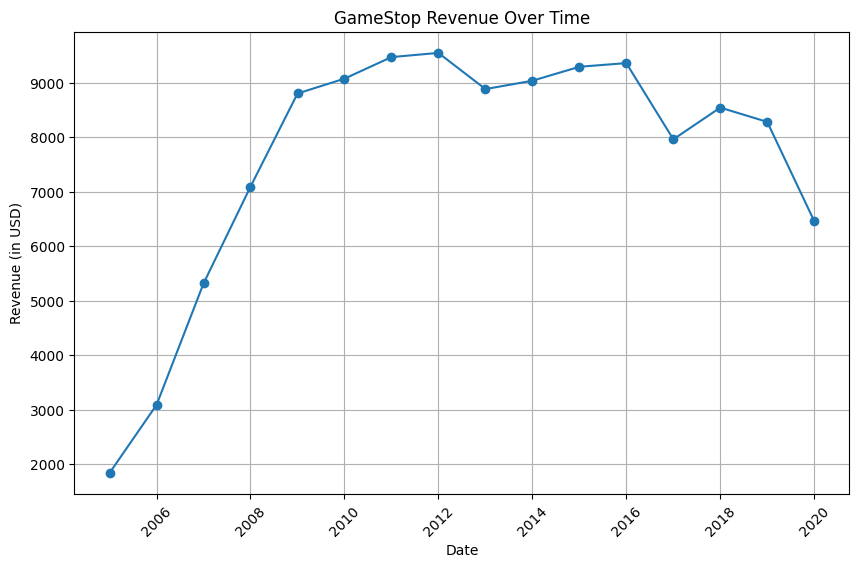

In [52]:
import matplotlib.pyplot as plt

# Zuerst bereinigen wir die Revenue-Daten
gamestop_data["Revenue"] = gamestop_data["Revenue"].str.replace('$', '').str.replace(',', '')
gamestop_data["Revenue"] = pd.to_numeric(gamestop_data["Revenue"], errors='coerce')
gamestop_data["Date"] = pd.to_datetime(gamestop_data["Date"])

# Jetzt plotten wir die Revenue-Daten
plt.figure(figsize=(10,6))
plt.plot(gamestop_data["Date"], gamestop_data["Revenue"], marker='o')
plt.title("GameStop Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue (in USD)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()